In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
train_file='D:/Analytics Vidya/Loan Prediction/train_file.csv'
test_file='D:/Analytics Vidya/Loan Prediction/test_file.csv'

In [114]:
train_loan=pd.read_csv(train_file)
test_loan=pd.read_csv(test_file)

In [52]:
train_loan.shape

(614, 13)

In [53]:
test_loan.shape

(367, 12)

In [54]:
train_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
train_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:
train_l=train_loan.copy()
test_l=test_loan.copy()

In [57]:
train_l['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [58]:
features_with_na=[features for features in train_l.columns if train_l[features].isnull().sum()>1]

In [59]:
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [60]:
from scipy import stats, integrate
import math

In [61]:
sns.set(color_codes=True)

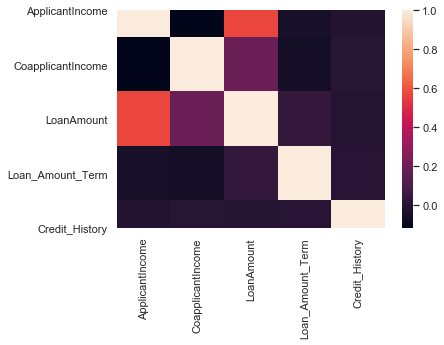

In [62]:
sns.heatmap(train_l.corr())

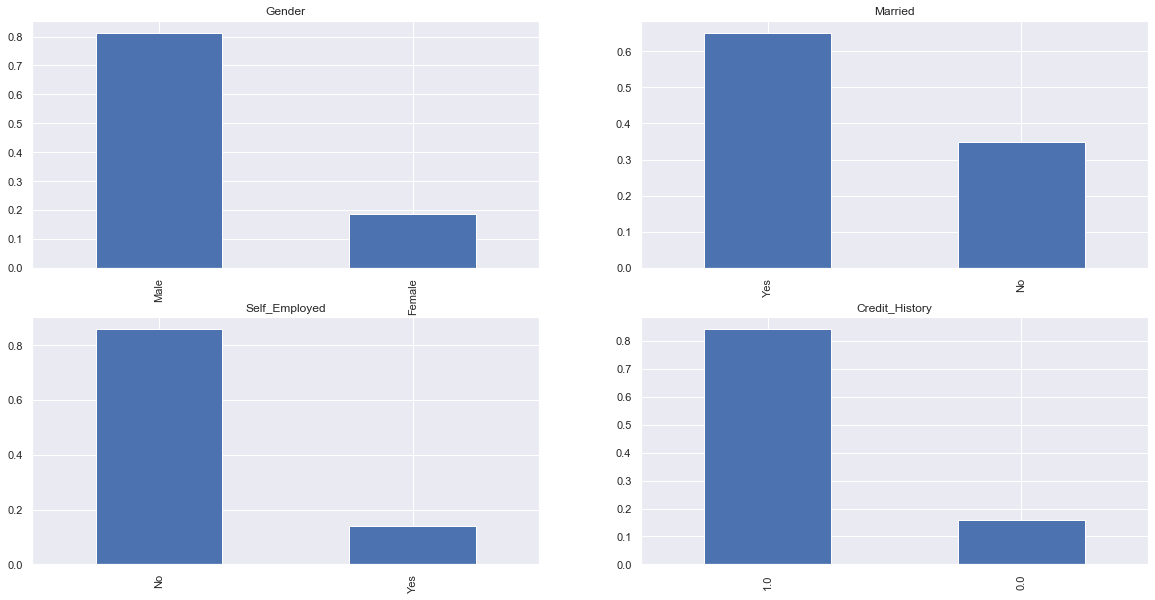

In [63]:
plt.figure(1)
plt.subplot(221) 
train_l['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train_l['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train_l['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train_l['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

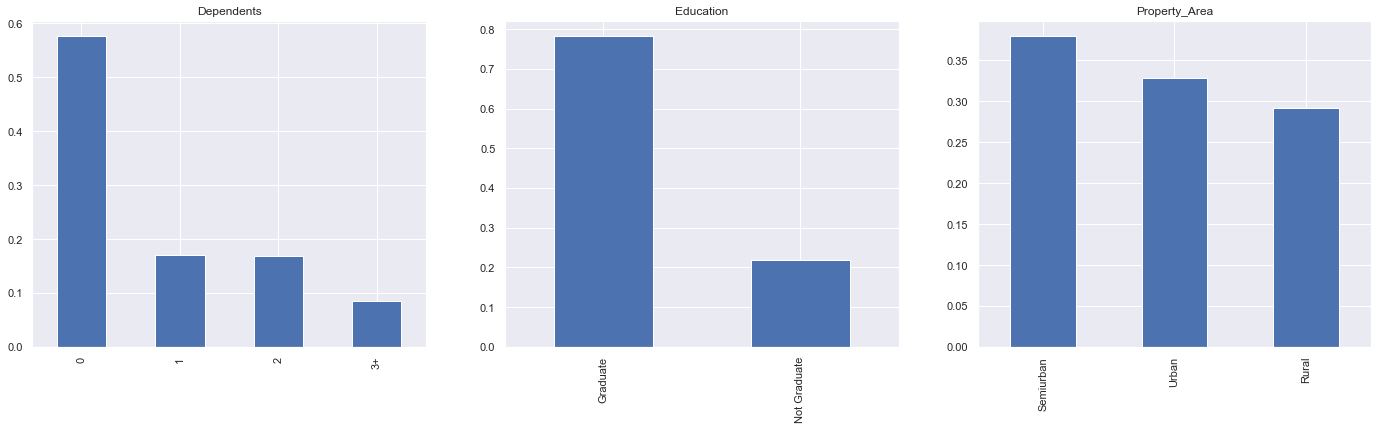

In [64]:
plt.figure(1)
plt.subplot(131) 
train_l['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train_l['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train_l['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

In [65]:
Gender=pd.crosstab(train_l['Gender'],train_l['Loan_Status'])

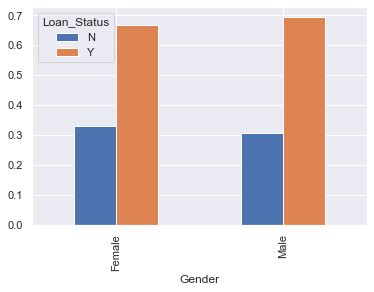

In [66]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar')


In [67]:
Married=pd.crosstab(train_l['Married'],train_l['Loan_Status'])
Dependents=pd.crosstab(train_l['Dependents'],train_l['Loan_Status'])
Education=pd.crosstab(train_l['Education'],train_l['Loan_Status'])
Self_Employed=pd.crosstab(train_l['Self_Employed'],train_l['Loan_Status'])

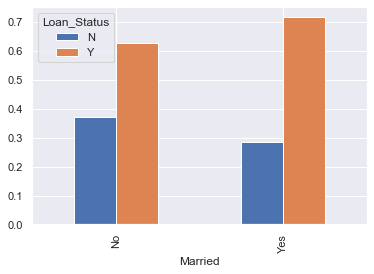

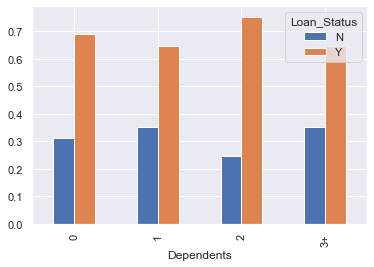

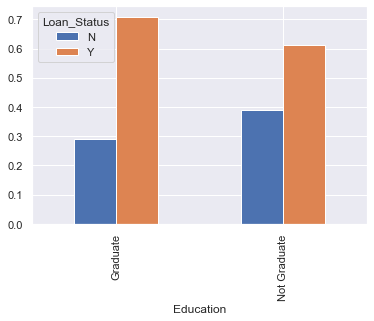

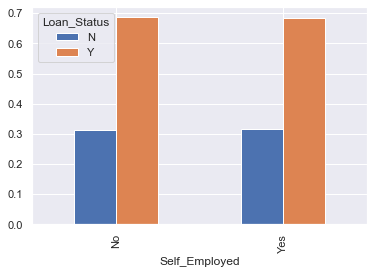

In [68]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar')
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar')
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar')
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar')
plt.show()

In [70]:
Credit_History=pd.crosstab(train_l['Credit_History'],train_l['Loan_Status'])
Property_Area=pd.crosstab(train_l['Property_Area'],train_l['Loan_Status'])

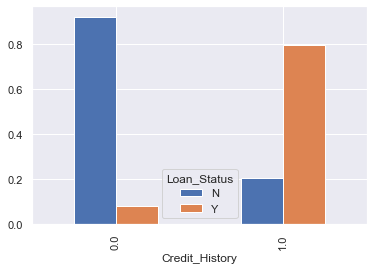

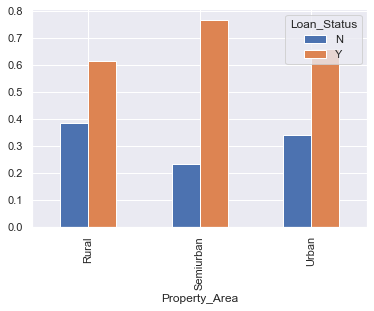

In [71]:
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar')
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar')
plt.show()

In [72]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']

In [73]:
train_l["Income_bin"]=pd.cut(train_l['ApplicantIncome'],bins,labels=group)

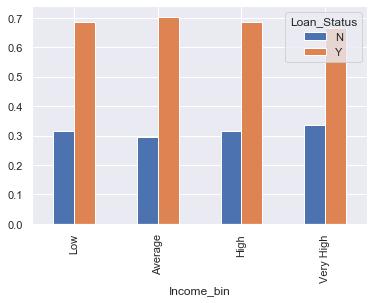

In [74]:
Income_bin=pd.crosstab(train_l['Income_bin'],train_l['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar')
plt.show()

In [76]:
numerical_features=[feature for feature in train_l.columns if train_l[feature].dtypes!='O']

In [78]:
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Income_bin']

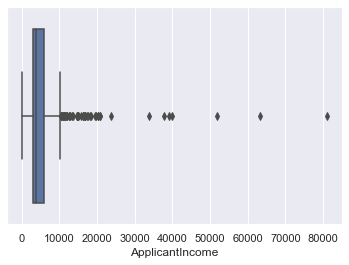

In [75]:
sns.boxplot(x='ApplicantIncome',data=train_l)

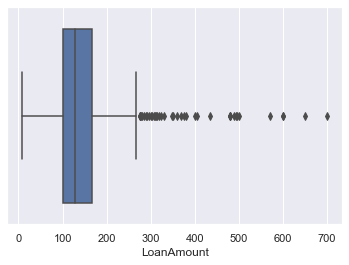

In [23]:
sns.boxplot(x='LoanAmount',data=train_l)

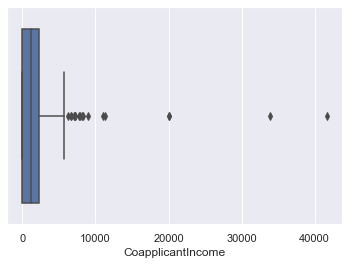

In [79]:
sns.boxplot(x='CoapplicantIncome',data=train_l)

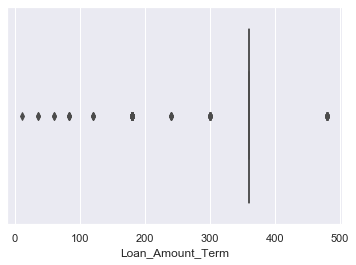

In [80]:
sns.boxplot(x='Loan_Amount_Term',data=train_l)

In [27]:
train_l['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
train_l['Gender'].fillna(train_l['Gender'].mode()[0],inplace=True)
train_l['Married'].fillna(train_l['Married'].mode()[0],inplace=True)
train_l['Dependents'].fillna(train_l['Dependents'].mode()[0],inplace=True)
train_l['Self_Employed'].fillna(train_l['Self_Employed'].mode()[0],inplace=True)
train_l['Credit_History'].fillna(train_l['Credit_History'].mode()[0],inplace=True)
train_l['Loan_Amount_Term'].fillna(train_l['Loan_Amount_Term'].mode()[0],inplace=True)

In [28]:
train_l.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
## Loan amount have outliers so, replacing with mean doesn't make sense
train_l['LoanAmount'].fillna(train_l['LoanAmount'].median(),inplace=True)

In [81]:
train_l.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Income_bin           category
dtype: object

In [115]:
test_loan['Loan_Status']=np.nan
train_loan['data']='train'
test_loan['data']='test'
test_loan=test_loan[train_loan.columns]

In [116]:
loan_all=pd.concat([train_loan,test_loan],axis=0)

In [117]:
loan_all.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
data                  object
dtype: object

In [129]:
print(loan_all['Married'].value_counts())
print(loan_all['Self_Employed'].value_counts())
print(loan_all["Dependents"].value_counts())
print(loan_all["Education"].value_counts())
print(loan_all['Loan_Status'].value_counts())

0    981
Name: Married, dtype: int64
0    981
Name: Self_Employed, dtype: int64
0    570
2    160
1    160
3     91
Name: Dependents, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [121]:
loan_all.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [122]:
## categorical variable missing values can be replaced with mean
loan_all['Gender'].fillna(loan_all['Gender'].mode()[0],inplace=True)
loan_all['Married'].fillna(loan_all['Married'].mode()[0],inplace=True)
loan_all['Dependents'].fillna(loan_all['Dependents'].mode()[0],inplace=True)
loan_all['Self_Employed'].fillna(loan_all['Self_Employed'].mode()[0],inplace=True)
loan_all['Credit_History'].fillna(loan_all['Credit_History'].mode()[0],inplace=True)
loan_all['Loan_Amount_Term'].fillna(loan_all['Loan_Amount_Term'].mode()[0],inplace=True)

In [123]:
## Loan amount have outliers so, replacing with mean doesn't make sense
loan_all['LoanAmount'].fillna(loan_all['LoanAmount'].median(),inplace=True)

In [125]:
loan_all.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
data                   0
dtype: int64

In [127]:
loan_all['Dependents'].replace('3+',3, inplace=True)
loan_all['Self_Employed']=np.where(loan_all["Self_Employed"]=="Y",1,0)
loan_all['Married']=np.where(loan_all["Married"]=="Y",1,0)

In [139]:
loan_all.dtypes

Gender                object
Married                int32
Dependents             int64
Education             object
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status          float64
data                  object
dtype: object

In [130]:
loan_all['Loan_Status'].replace('Y',1, inplace=True)
loan_all['Loan_Status'].replace('N',0, inplace=True)

In [132]:
loan_all['Dependents']=pd.to_numeric(loan_all['Dependents'],errors="coerce")

In [138]:
loan_all.drop('Loan_ID',axis=1,inplace=True)

In [140]:
train=loan_all[loan_all['data']=='train']
del train['data']
test=loan_all[loan_all['data']=='test']
test.drop(['Loan_Status','data'],axis=1,inplace=True)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
train=pd.get_dummies(train)

In [143]:
train.shape

(614, 16)

In [144]:
x_train=train.drop('Loan_Status',axis=1)
y_train=train["Loan_Status"]

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
train1,train2=train_test_split(train,test_size=0.2,random_state=42)

In [148]:
x_train1=train1.drop('Loan_Status',axis=1)
y_train1=train1["Loan_Status"]

In [149]:
x_val=train2.drop('Loan_Status',axis=1)
y_val=train2["Loan_Status"]

In [159]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score

In [150]:
from sklearn.linear_model import LogisticRegression


In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [152]:
clf=LogisticRegression()

In [294]:
params={'class_weight':[None],
        'penalty':['l1','l2'],
        'C':np.linspace(0.1,100,50)
       }

In [295]:
random_search=RandomizedSearchCV(clf, cv=10, param_distributions=params,
                    scoring='roc_auc',n_iter=35, n_jobs=-1,
                    verbose=False)

In [296]:
random_search.fit(x_train1,y_train1)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=35, n_jobs=-1,
                   param_distributio...
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367

In [297]:
logr=random_search.best_estimator_
logr.fit(x_train1,y_train1)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=85.72857142857143, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [298]:
y_pred=logr.predict(x_val)

In [299]:
print('Metrics of logisticregression')
print("-------------------------------")
print(confusion_matrix(y_val,y_pred))

print(accuracy_score(y_val,y_pred))

print(roc_auc_score(y_val,y_pred))

print(recall_score(y_val,y_pred))

print(precision_score(y_val,y_pred))

print(fbeta_score(y_val,y_pred,1))

Metrics of logisticregression
-------------------------------
[[18 25]
 [ 1 79]]
0.7886178861788617
0.7030523255813954
0.9875
0.7596153846153846
0.8586956521739131


In [219]:
from sklearn.tree import DecisionTreeClassifier

In [276]:
params={'class_weight':[None],
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10],
        'min_samples_leaf':[1,5,10,15],
        'min_samples_split':[2,5,10,15],
        "max_features":[2,5,10,15]
}

In [277]:
clf_DT=DecisionTreeClassifier()

In [283]:
random_search=RandomizedSearchCV(clf_DT, cv=10, param_distributions=params,
                    scoring='roc_auc',n_iter=150, n_jobs=-1,
                    verbose=False)

In [284]:
random_search.fit(x_train1,y_train1)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [285]:
dtree=random_search.best_estimator_
dtree.fit(x_train1,y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [286]:
y_pred1=dtree.predict(x_val)

In [287]:
print('Metrics of DTree')
print("-------------------------------")
print(confusion_matrix(y_val,y_pred1))

print(accuracy_score(y_val,y_pred1))

print(roc_auc_score(y_val,y_pred1))

print(recall_score(y_val,y_pred1))

print(precision_score(y_val,y_pred1))

print(fbeta_score(y_val,y_pred1,1))

Metrics of DTree
-------------------------------
[[18 25]
 [ 4 76]]
0.7642276422764228
0.6843023255813954
0.95
0.7524752475247525
0.8397790055248618


In [182]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
param_dist = {"n_estimators":[222,333,555,777,1000],
                "max_features": [5,10,15],
                "bootstrap": [True, False],
                "class_weight":[None],
                "criterion":['entropy','gini'],
                "max_depth":[None,5,8,12],
                "min_samples_leaf":[1,2,5,10],
                "min_samples_split":[2,5,10,15],
                 'max_leaf_nodes':[2,5,10]}

In [242]:
clf_rf=RandomForestClassifier()

In [243]:
n_iter_search=15
random_search=RandomizedSearchCV(clf_rf,param_distributions=param_dist,
                                n_iter=n_iter_search,
                                scoring='roc_auc',
                                cv=10)

In [244]:
random_search.fit(x_train1,y_train1)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [245]:
rfc=random_search.best_estimator_
rfc.fit(x_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=10, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [246]:
y_pred2=rfc.predict(x_val)

In [247]:
print('Metrics of Random_forest')
print("-------------------------------")
print(confusion_matrix(y_val,y_pred2))

print(accuracy_score(y_val,y_pred2))

print(roc_auc_score(y_val,y_pred2))

print(recall_score(y_val,y_pred2))

print(precision_score(y_val,y_pred2))

print(fbeta_score(y_val,y_pred2,1))

Metrics of Random_forest
-------------------------------
[[18 25]
 [ 1 79]]
0.7886178861788617
0.7030523255813954
0.9875
0.7596153846153846
0.8586956521739131


In [248]:
from xgboost.sklearn import XGBClassifier

In [249]:
clf_XB=XGBClassifier()

In [250]:
param_dist_XBG = {
              "max_depth": [2,3,4,5,6],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
    "min_child_weight":[4,5,6],
              "subsample":[i/10.0 for i in range(6,10)],
 "colsample_bytree":[i/10.0 for i in range(6,10)],
               "reg_alpha":[1e-5, 1e-2, 0.1, 1,5,10],
              "gamma":[i/10.0 for i in range(2,10)],
    "n_estimators":[100,333,500,700,999],
    'scale_pos_weight':[2,3,4,5,6,7,8,9]
    
              }

In [251]:
n_iter=40

random_search=RandomizedSearchCV(clf_XB,scoring='roc_auc',
                                param_distributions=param_dist_XBG,
                                cv=10,n_iter=40,
                                n_jobs=-1,verbose=False)

In [252]:
random_search.fit(x_train1,y_train1)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=...
                                                  0.8, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                 

In [253]:
XBM=random_search.best_estimator_
XBM.fit(x_train1,y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.6,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [254]:
y_pred3=XBM.predict(x_val)

In [255]:
print('Metrics for XGBOOST')
print("-------------------------------")
print(confusion_matrix(y_val,y_pred3))

print(accuracy_score(y_val,y_pred3))

print(roc_auc_score(y_val,y_pred3))

print(recall_score(y_val,y_pred3))

print(precision_score(y_val,y_pred3))

print(fbeta_score(y_val,y_pred3,1))

Metrics for XGBOOST
-------------------------------
[[18 25]
 [ 1 79]]
0.7886178861788617
0.7030523255813954
0.9875
0.7596153846153846
0.8586956521739131


In [202]:
test.shape

(367, 11)

In [203]:
train.shape

(614, 16)

In [204]:
test=pd.get_dummies(test)

In [205]:
test.shape

(367, 15)

In [300]:
logr.fit(x_train,y_train)

C:\Users\Pc\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=85.72857142857143, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [264]:
predictions=dtree.predict(test)

In [301]:
p=logr.predict(test)

In [302]:
p

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [270]:
predictions1=XBM.predict(test)

In [265]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [271]:
predictions1

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [211]:
pd.DataFrame(predictions).to_csv("Loan_predictions.csv",index=False)

In [303]:
submission=pd.read_csv('D:/Analytics Vidya/Loan Prediction/sample_submission_49d68Cx.csv')

In [304]:
submission['Loan_status']=p

In [305]:
submission['Loan_Status'].replace(0,"N",inplace=True)
submission['Loan_Status'].replace(1,"Y",inplace=True)

In [306]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("Loan_predictions4.csv")